In [1]:
#linear regression is a supervised regression model, but logistic regression is a supervised classification model
#predicting the value of a certain image - classifying it based on training data

import torch
#The torchvision package consists of popular datasets, model architectures, and common image transformations 
#for computer vision.
import torchvision
#import the MNIST dataset, which has all of the images - very popular, like the iris dataset
from torchvision.datasets import MNIST
import numpy

In [2]:
#actually download the dataset inside the data directory
dataset = MNIST(root='data/', download=True)

In [3]:
#look in your ml-notebooks directory - there is a directory called data. This is where we will store all of 
#the datasets that need separate files. The linear regression model was trained on very small amounts of data
#and they were both tensors, so its easier to just store the data locally

In [4]:
#The dataset has 60,000 images! We will have an ample amount of training data
print(len(dataset))

60000


In [5]:
#this dows not need to be download
test = MNIST(root='data/', train=False)
print(len(test))

10000


In [6]:
print(dataset[0])

(<PIL.Image.Image image mode=L size=28x28 at 0x12ABE60B8>, 5)


Label: 0


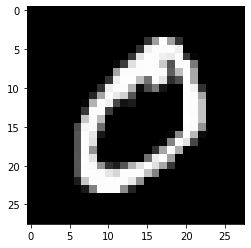

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

image, label = dataset[1]

plt.imshow(image, cmap='gray')
print("Label:", label)

In [8]:
import torchvision.transforms as transforms

dataset = MNIST(root="data/", train=True, transform=transforms.ToTensor())
ten, lab = dataset[0]


In [9]:
#Print the pixels at the 10th to 15th y axis 
print(ten[:,10:15, 10:15])
#1 represents white, and 0 represents black - the some of these values are just in between

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


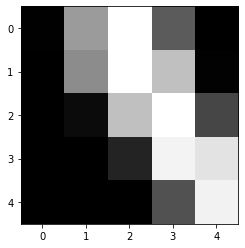

In [10]:
plt.imshow(ten[0,10:15,10:15], cmap='gray')

In [11]:
#split set into 3 models - training set, validation set, test set
#training set - used to train the model , compute the loss, adjust the weights 
#validation set - evaluate the model while training, adjust parameters like the learning rate, and pick the best model
#test set - used to compare models

In [12]:
import numpy as np

def split_indices(n, val_pct):
    #split the val into a training dataset and a validation dataset
    n_val = int(val_pct*n)
    
    #random images for the validation set and for the training dataset 
    idxs = np.random.permutation(n)
    
    #returns the first n_vals in a tuple, so basically a fraction of the entire dataset, and splits the rest for
    #the training set
    return idxs[n_val:], idxs[:n_val]

In [13]:
train_indices, val_indices = split_indices(len(dataset), 0.2)

In [14]:
#randomize the data in order to remove bias

#sample randomly from indices
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [15]:
batches = 100

#randomize the data samples
train_sampler = SubsetRandomSampler(train_indices)
train_loader= DataLoader(dataset, batches, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset, batches, sampler=val_sampler)


In [16]:
#Define the model

#The logistic regression model is very similar to the linear regression model

#there are weights and there are biases - output is obtained by using matrix operations

#we can use nn.Linear to crreate the model - and flattened to a vector of size 784

In [17]:
import torch.nn as nn

#the output of each image is a vector of size 10, with each element of the vector signifying the probability of 
#a particular target label - 0 to 9

input_size = 28*28 #flatten the image

num_classes = 10

# model = nn.Linear(input_size, num_classes)

#super similar to the linear regression model - but this time the inputs and the outputs are way more


In [18]:
# for imgs, labels in train_loader:
#     print(labels)
#     print(imgs.shape)
#     outputs = model(imgs)
#     break

In [25]:
#Since the linear method is expecting a vector, we can't just pass in a tensor that has 3 dimensions, 
#we need to flatten it out - we can do this by creating a model class that inherists from the nn.module class
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        #putting -1 allows us to use any batch size
        xb=xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
    
model = MnistModel()

for images, labels in train_loader:
    outputs = model(images)
    break
    
print(outputs.shape, outputs[:1].data) 


#the outputs are the random result of passing in the images into the model. However, we need them to represent
#a probability, which is between 1 and 0

torch.Size([100, 10]) tensor([[ 0.2279,  0.0370, -0.3274,  0.0015,  0.0403,  0.0059, -0.1457,  0.1277,
         -0.1337,  0.1332]])


In [21]:
#softmax function
#probability is boosted up, tries to push it towards one output
#divide by sum to end up with probabilities

import torch.nn.functional as F

In [26]:
probs = F.softmax(outputs, dim=1)

#these sum up to one

tensor([[0.1246, 0.1029, 0.0715, 0.0993, 0.1033, 0.0998, 0.0857, 0.1127, 0.0868,
         0.1133],
        [0.1168, 0.0996, 0.0713, 0.1067, 0.0905, 0.1050, 0.1084, 0.1020, 0.0926,
         0.1070],
        [0.0934, 0.1019, 0.1037, 0.0884, 0.1108, 0.0873, 0.1139, 0.0912, 0.1203,
         0.0892],
        [0.0920, 0.0886, 0.0694, 0.1061, 0.0976, 0.1255, 0.1091, 0.1168, 0.0929,
         0.1020],
        [0.1245, 0.0894, 0.0910, 0.0775, 0.1023, 0.1082, 0.1214, 0.0743, 0.1088,
         0.1026],
        [0.1299, 0.0804, 0.1178, 0.0941, 0.1129, 0.0997, 0.0899, 0.0806, 0.1000,
         0.0945],
        [0.1194, 0.0844, 0.0867, 0.0937, 0.1187, 0.0959, 0.1059, 0.0769, 0.1265,
         0.0920],
        [0.1323, 0.0842, 0.0559, 0.1014, 0.0976, 0.1261, 0.1124, 0.0837, 0.0853,
         0.1211],
        [0.1256, 0.0826, 0.0676, 0.1052, 0.1016, 0.1051, 0.1131, 0.0941, 0.0995,
         0.1055],
        [0.1386, 0.1061, 0.0661, 0.0950, 0.1014, 0.0939, 0.1020, 0.0885, 0.0966,
         0.1118],
        [0

In [29]:
max_probs, preds = torch.max(probs, dim=1)
#index of the max probability
print(preds)
# print(max_probs)

tensor([0, 0, 8, 5, 0, 0, 8, 0, 0, 0, 9, 8, 4, 0, 3, 0, 0, 8, 0, 5, 7, 0, 3, 9,
        6, 0, 0, 0, 7, 5, 7, 6, 8, 8, 8, 3, 8, 5, 0, 8, 7, 0, 5, 7, 8, 0, 5, 0,
        7, 3, 3, 7, 0, 8, 1, 5, 7, 6, 0, 0, 7, 8, 0, 0, 2, 8, 6, 7, 0, 3, 8, 5,
        7, 7, 9, 6, 0, 8, 5, 7, 5, 6, 9, 5, 5, 6, 0, 5, 9, 5, 8, 5, 5, 0, 3, 8,
        3, 7, 9, 3])


In [30]:
#what the number is in the index
labels

tensor([1, 9, 3, 7, 5, 3, 8, 8, 8, 9, 1, 0, 3, 9, 9, 1, 4, 3, 9, 9, 1, 8, 4, 1,
        3, 8, 9, 4, 7, 7, 5, 5, 0, 2, 0, 1, 9, 9, 9, 0, 9, 6, 2, 9, 0, 3, 2, 9,
        4, 7, 9, 5, 9, 3, 1, 2, 4, 6, 2, 3, 1, 5, 3, 6, 7, 0, 2, 6, 5, 7, 2, 9,
        4, 4, 1, 3, 8, 0, 4, 7, 1, 0, 8, 6, 8, 6, 7, 6, 1, 2, 9, 6, 5, 9, 1, 2,
        7, 4, 9, 2])